## Imports

In [258]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from datasets import load_dataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

### Importing Dataset

In [8]:
dataset = load_dataset('weeebdev/diabetes')
print(dataset) 

DatasetDict({
    train: Dataset({
        features: ['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age (years)', 'Class variable'],
        num_rows: 768
    })
})


In [39]:
df = dataset["train"].to_pandas()
df.to_csv("diabetes.csv", index=False)

In [40]:
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Preprocessing

### Detecting missing records

In [12]:
df.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable                                                              0
dtype: int64

The dataset does not have any null values so no need for filling

In [13]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

All columns are numeric so no need for conversion

In [15]:
df['Class variable'].unique()

array([1, 0], dtype=int64)

The target variable is only 0 or 1 which means it does not need encoding

In [17]:
df['Class variable'].value_counts()

Class variable
0    500
1    268
Name: count, dtype: int64

Data is unbalanced

May apply oversampling to the minority class

### Splitting Data

In [299]:
x = df.iloc[:,1:-1] # Features columns
y = df['Class variable'] # Target column

In [300]:
# 20%->test 8%->validation 72%->train
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2, shuffle = True, random_state = 5)
X_train,X_val,Y_train,Y_val = train_test_split(X_train, Y_train, test_size=0.1, shuffle =True, random_state = 5) #0.1*0.8=8% val and 72% train

# print("X_train shape: {}".format(X_train.shape))
# print("X_test shape: {}".format(X_test.shape))
# print("X_val shape: {}".format(X_val.shape))
# print("y_train shape: {}".format(Y_train.shape))
# print("y_test shape: {}".format(Y_test.shape))
# print("y_val shape: {}".format(Y_val.shape))

### Normalization

#### MaxMin Normalization

In [301]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(0,1))
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scale.transform(X_test), columns=X_test.columns, index=X_test.index)
X_val = pd.DataFrame(scale.transform(X_val), columns=X_val.columns, index=X_val.index)

#### Z-score Standardization

In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scale.transform(X_test), columns=X_test.columns, index=X_test.index)
X_val = pd.DataFrame(scale.transform(X_val), columns=X_val.columns, index=X_val.index)
    

### Visualizing Correlation Between features

In [302]:
# the relation between every varibale and the other
X_train.corr()

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,1.000000,0.158484,0.046377,0.309836,0.173828,0.117672,0.304307
Diastolic blood pressure (mm Hg),0.158484,1.000000,0.216563,0.089655,0.305204,0.030735,0.246108
Triceps skin fold thickness (mm),0.046377,0.216563,1.000000,0.422953,0.432657,0.172626,-0.098203
2-Hour serum insulin (mu U/ml),0.309836,0.089655,0.422953,1.000000,0.211141,0.195158,-0.013983
Body mass index (weight in kg/(height in m)^2),0.173828,0.305204,0.432657,0.211141,1.000000,0.118952,0.024848
Diabetes pedigree function,0.117672,0.030735,0.172626,0.195158,0.118952,1.000000,0.040371
Age (years),0.304307,0.246108,-0.098203,-0.013983,0.024848,0.040371,1.000000


In [303]:
#the relation between every variable and the target variable
X_train.join(Y_train).corr()['Class variable']

Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.452806
Diastolic blood pressure (mm Hg)                                            0.053601
Triceps skin fold thickness (mm)                                            0.059886
2-Hour serum insulin (mu U/ml)                                              0.145808
Body mass index (weight in kg/(height in m)^2)                              0.258445
Diabetes pedigree function                                                  0.178289
Age (years)                                                                 0.236888
Class variable                                                              1.000000
Name: Class variable, dtype: float64

Plasma glucose is the feature that most affect the classification of diabetes

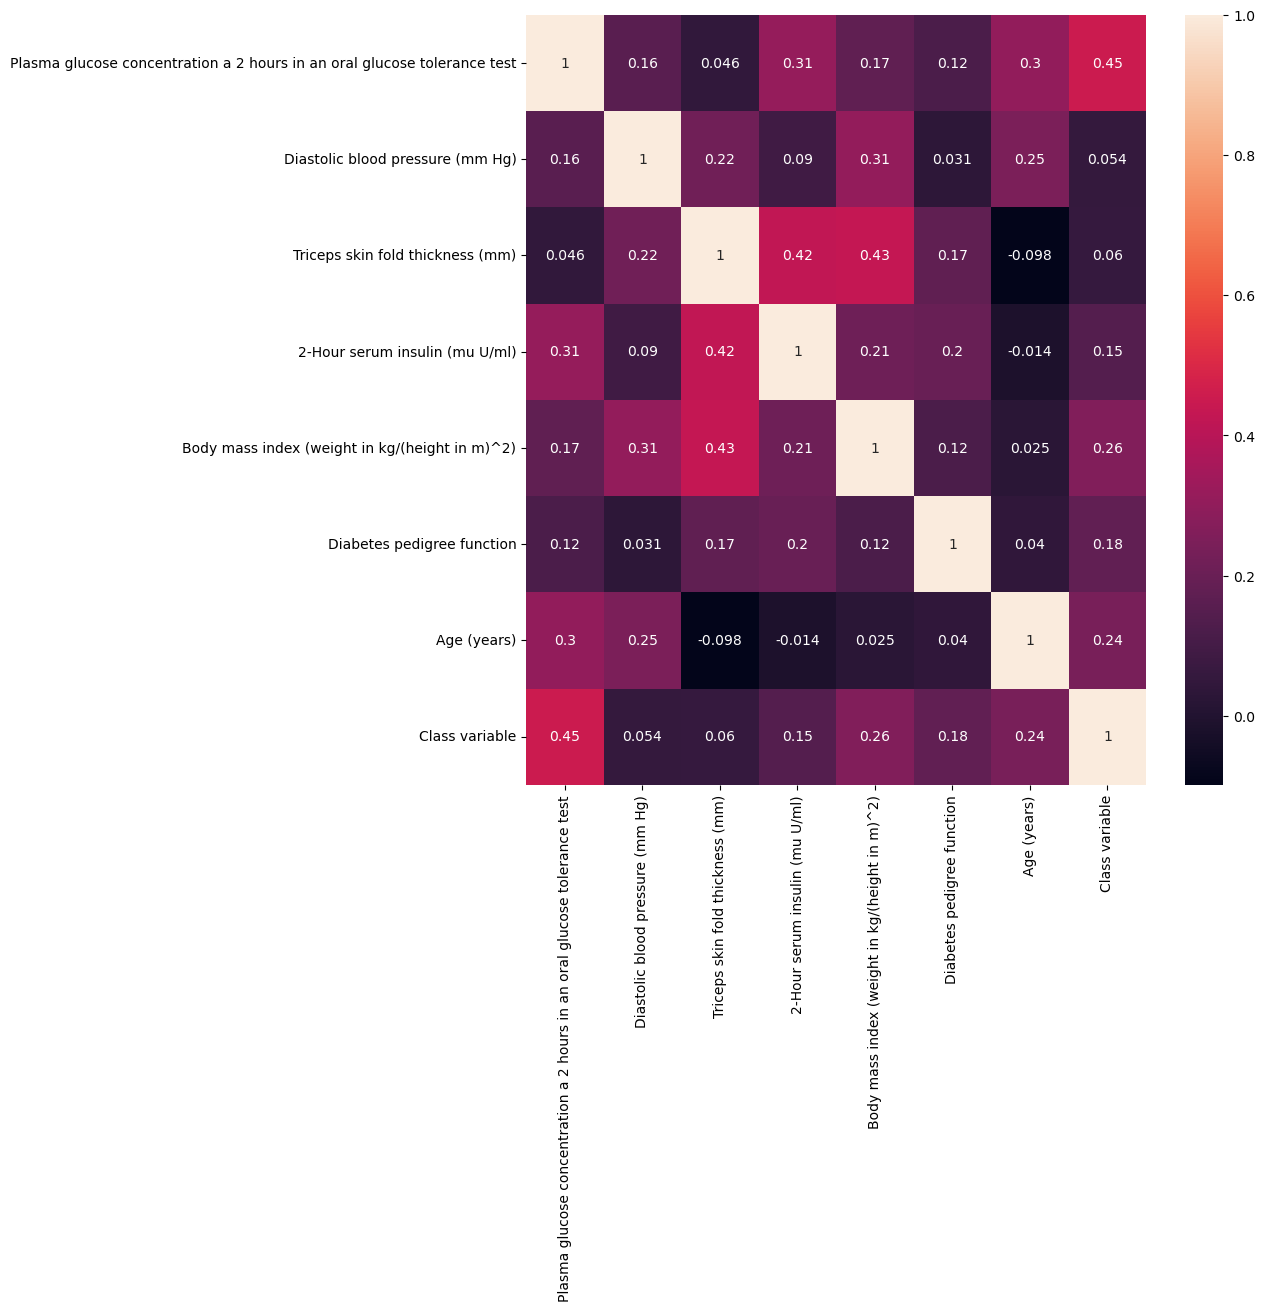

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X_train.join(Y_train).corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True)

In [337]:
results = []

def log_results(model_name, y_pred):
    report = classification_report(Y_test, y_pred, output_dict=True)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(Y_test, y_pred),
        'Precision (Class 0)': report['0']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'F1 (Class 0)': report['0']['f1-score'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1 (Class 1)': report['1']['f1-score']
    })

## KNN

### Hyperparameters Tuning

In [321]:
scores = []
for i in range(5,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, Y_train, cv=5)
    scores.append(np.mean(score))

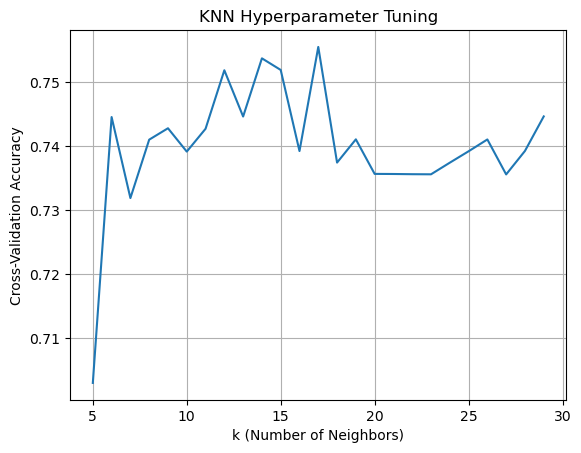

In [322]:
import matplotlib.pyplot as plt
k_values = [i for i in range (5,30)]
plt.plot(k_values, scores)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.grid(True)
plt.show()

The optimum value is at k=17

### Knn Model

In [323]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_pred_knn,Y_test)
print("Accuracy:", accuracy_knn)

Accuracy: 0.7532467532467533


In [324]:
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
print(cm_knn)
print(classification_report(Y_test, Y_pred_knn, target_names=['0','1']))

[[88 12]
 [26 28]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Recall and F1 score of 1 class are relitavely low(was not able to well detect 1 class)

This may be due to the imbalnce in data which shows that the model favors class 0 over class 1(bias)


In [338]:
log_results('KNN', Y_pred_knn)

In [339]:
results

[{'Model': 'KNN',
  'Accuracy': 0.7532467532467533,
  'Precision (Class 0)': 0.7719298245614035,
  'Recall (Class 0)': 0.88,
  'F1 (Class 0)': 0.822429906542056,
  'Precision (Class 1)': 0.7,
  'Recall (Class 1)': 0.5185185185185185,
  'F1 (Class 1)': 0.5957446808510638}]

In [139]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)

print(Y_train.count())

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\utils\deprecation.py)

## SVM

### Linear kernal

#### Hyperparameter tuning

In [327]:
#finding the optimum c value
#used gridsearch with a defined paramater dictionary to trya ll possible combinations
svm_linear = svm.SVC(kernel='linear')
param_grid = {
    'C': np.logspace(-4, 4, 20)  
}
grid_search = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid,
    cv=5,             
    scoring='accuracy', 
    verbose=True,
    n_jobs=1           
)
grid_search

,estimator,SVC(kernel='linear')
,param_grid,{'C': array([1.0000...00000000e+04])}
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [328]:
best_lin = grid_search.fit(x,y)
best_lin.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,C,29.763514416313132
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


##### Defualt parameters

In [331]:
svm_lin = svm.SVC(kernel = 'linear')
svm_lin.fit(X_train, Y_train)
Y_pred_lin = svm_lin.predict(X_test)
accuracy_lin = accuracy_score(Y_test, Y_pred_lin)
print("Accuracy:",accuracy_lin)

Accuracy: 0.7922077922077922


In [332]:
cm_lin = confusion_matrix(Y_test, Y_pred_lin)
print(cm_lin)
print(classification_report(Y_test, Y_pred_lin, target_names=['0','1']))

[[91  9]
 [23 31]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       100
           1       0.78      0.57      0.66        54

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.79      0.79      0.78       154



##### Parameters from tuning

In [333]:
svm_lin_tune = svm.SVC(kernel = 'linear', **grid_search.best_params_)
svm_lin_tune.fit(X_train, Y_train)
Y_pred_lin_tune = svm_lin_tune.predict(X_test)
accuracy_lin_tune = accuracy_score(Y_test, Y_pred_lin_tune)
print("Accuracy:",accuracy_lin_tune)

Accuracy: 0.8051948051948052


In [334]:
cm_lin_tune = confusion_matrix(Y_test, Y_pred_lin_tune)
print(cm_lin_tune)
print(classification_report(Y_test, Y_pred_lin_tune, target_names=['0','1']))

[[89 11]
 [19 35]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       100
           1       0.76      0.65      0.70        54

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



SVM liner kernel shows higher accuracy,recall and precision for both classes than the KNN model.

The tuned model has a slightly better accuracy than the model with the default parameters.

This model may experiance less bias since it was able to classify more correct class 1 cases than KNN.

This model has the best accuracy of all models 81% followed by the fine-tuned XGBOOST model


In [341]:
log_results('SVM_lin_tune', Y_pred_lin_tune)

### RBF Kernel

#### Hyperparameter tuning

In [342]:
#finding the optimum c value
svm_rbf = svm.SVC(kernel='rbf')
param_grid_rbf = {
    'C': np.logspace(-4, 4, 20),
    'gamma': [0.01, 0.1, 1, 10]
}
grid_search_rbf = GridSearchCV(
    estimator=svm_rbf,
    param_grid=param_grid_rbf,
    cv=5,             
    scoring='accuracy', 
    verbose=True,
    n_jobs=1           
)
grid_search_rbf


,estimator,SVC()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'gamma': [0.01, 0.1, ...]}"
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [343]:
best_rbf = grid_search_rbf.fit(x,y)
best_rbf.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


,C,0.615848211066026
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


##### Defualt Parameters

In [344]:
svm_rbf = svm.SVC(kernel = 'rbf')
svm_rbf.fit(X_train, Y_train)
Y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(Y_test, Y_pred_rbf)
print("Accuracy:",accuracy_rbf)

Accuracy: 0.7662337662337663


In [345]:
cm_rbf = confusion_matrix(Y_test, Y_pred_rbf)
print(cm_rbf)
print(classification_report(Y_test, Y_pred_rbf, target_names=['0','1']))

[[87 13]
 [23 31]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



##### Parameters from tuning

In [346]:
svm_rbf_tune = svm.SVC(kernel = 'rbf',**grid_search_rbf.best_params_ )
svm_rbf_tune.fit(X_train, Y_train)
Y_pred_rbf_tune = svm_rbf_tune.predict(X_test)
accuracy_rbf_tune = accuracy_score(Y_test, Y_pred_rbf_tune)
print("Accuracy:",accuracy_rbf_tune)

Accuracy: 0.6493506493506493


In [347]:
cm_rbf_tune = confusion_matrix(Y_test, Y_pred_rbf_tune)
print(cm_rbf_tune)
print(classification_report(Y_test, Y_pred_rbf_tune, target_names=['0','1']))

[[100   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

RBF kernel default parameters had much better accuracy, recall and precision values than model with the tuned parameters.

The tuned model was not able to detect any sample of class 1 which negatively affected the accuracy of the model this may be due to the imbalance as well.

RBF kernel had bettwer accuracy than KNN model but still the linear kernel had the best accuracy 79%.



In [348]:
log_results('SVM_RBF_default' , Y_pred_rbf)

### Sigmoid Kernel

#### Hyperparameters tuning

In [349]:
#finding the optimum c value
svm_sig = svm.SVC(kernel='sigmoid')
param_grid_sig = {
    'C': np.logspace(-4, 4, 20),
    'gamma': [0.01, 0.1, 1, 10]
}
grid_search_sig = GridSearchCV(
    estimator=svm_sig,
    param_grid=param_grid_sig,
    cv=5,             
    scoring='accuracy', 
    verbose=True,
    n_jobs=1           
)
grid_search_sig


,estimator,SVC(kernel='sigmoid')
,param_grid,"{'C': array([1.0000...00000000e+04]), 'gamma': [0.01, 0.1, ...]}"
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [350]:
best_sig = grid_search_sig.fit(x,y)
best_sig.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


,C,0.0001
,kernel,'sigmoid'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


##### Default parameters

In [351]:
svm_sig = svm.SVC(kernel = 'sigmoid')
svm_sig.fit(X_train, Y_train)
Y_pred_sig = svm_sig.predict(X_test)
accuracy_sig = accuracy_score(Y_test, Y_pred_sig)
print("Accuracy:",accuracy_sig)

Accuracy: 0.35064935064935066


In [352]:
cm_sig = confusion_matrix(Y_test, Y_pred_sig)
print(cm_sig)
print(classification_report(Y_test, Y_pred_sig, target_names=['0','1']))

[[49 51]
 [49  5]]
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       100
           1       0.09      0.09      0.09        54

    accuracy                           0.35       154
   macro avg       0.29      0.29      0.29       154
weighted avg       0.36      0.35      0.35       154



##### Parameters from tuning

In [353]:
svm_sig_tune = svm.SVC(kernel = 'sigmoid', **grid_search_sig.best_params_)
svm_sig_tune.fit(X_train, Y_train)
Y_pred_sig_tune = svm_sig_tune.predict(X_test)
accuracy_sig_tune = accuracy_score(Y_test, Y_pred_sig_tune)
print("Accuracy:",accuracy_sig_tune)

Accuracy: 0.6493506493506493


In [354]:
cm_sig_tune = confusion_matrix(Y_test, Y_pred_sig_tune)
print(cm_sig_tune)
print(classification_report(Y_test, Y_pred_sig_tune, target_names=['0','1']))

[[100   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

In [355]:
log_results('SVM_sig_tuned', Y_pred_sig_tune)

C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

The default sigmoid kernel has extermely low accuracy. It is the least accuracy of all models.

The hyperprameters used enhanced the accuracy by about 50%.

Both models have extremely low recall and precision and F1 values for class 1 specifically.

In [356]:
results

[{'Model': 'KNN',
  'Accuracy': 0.7532467532467533,
  'Precision (Class 0)': 0.7719298245614035,
  'Recall (Class 0)': 0.88,
  'F1 (Class 0)': 0.822429906542056,
  'Precision (Class 1)': 0.7,
  'Recall (Class 1)': 0.5185185185185185,
  'F1 (Class 1)': 0.5957446808510638},
 {'Model': 'SVM_lin_tune',
  'Accuracy': 0.8051948051948052,
  'Precision (Class 0)': 0.8240740740740741,
  'Recall (Class 0)': 0.89,
  'F1 (Class 0)': 0.8557692307692307,
  'Precision (Class 1)': 0.7608695652173914,
  'Recall (Class 1)': 0.6481481481481481,
  'F1 (Class 1)': 0.7},
 {'Model': 'SVM_RBF_default',
  'Accuracy': 0.7662337662337663,
  'Precision (Class 0)': 0.7909090909090909,
  'Recall (Class 0)': 0.87,
  'F1 (Class 0)': 0.8285714285714286,
  'Precision (Class 1)': 0.7045454545454546,
  'Recall (Class 1)': 0.5740740740740741,
  'F1 (Class 1)': 0.6326530612244898},
 {'Model': 'SVM_sig_tuned',
  'Accuracy': 0.6493506493506493,
  'Precision (Class 0)': 0.6493506493506493,
  'Recall (Class 0)': 1.0,
  'F1 (Cl

### Polynomial Kernel

#### Hyperparamter tuning

In [358]:
d_values = [i for i in range (1,10)]
scores = []

for d in d_values:
    poly = svm.SVC(kernel = 'poly' , degree = d )
    score = cross_val_score(poly, X_train, Y_train, cv=5)
    scores.append(np.mean(score))

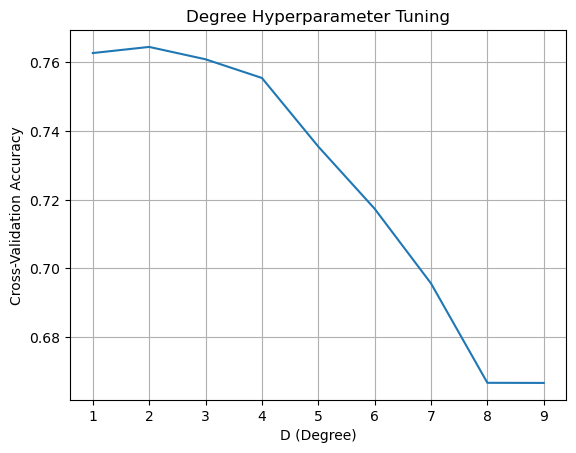

In [359]:
plt.plot(d_values, scores)
plt.xlabel("D (Degree)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Degree Hyperparameter Tuning")
plt.grid(True)
plt.show()

##### Defualt parameters

In [360]:
svm_pol = svm.SVC(kernel = 'poly')
svm_pol.fit(X_train, Y_train)
Y_pred_pol = svm_pol.predict(X_test)
accuracy_pol = accuracy_score(Y_test, Y_pred_pol)
print("Accuracy:",accuracy_pol)

Accuracy: 0.7922077922077922


In [361]:
cm_pol = confusion_matrix(Y_test, Y_pred_pol)
print(cm_pol)
print(classification_report(Y_test, Y_pred_pol, target_names=['0','1']))

[[89 11]
 [21 33]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       100
           1       0.75      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [362]:
log_results('SVM_poly' , Y_pred_pol)

The degree output from tuning was 2 which is same as the default value

This model has almost the same accuracy as the linear kernel and they both are the best model till now from all the tested ones.

This model has relatively good precision, recall and f1 score for both classes

## Logistic Regression

### Hyperparameters Tuning

In [163]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga']
}
]

log_reg = LogisticRegression()

In [164]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_reg ,param_grid = param_grid, cv = 5, verbose=True,n_jobs=1)
clf

,estimator,LogisticRegression()
,param_grid,"[{'C': array([1.0000...00000000e+04]), 'max_iter': [100, 1000, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'newton-cg', ...]}]"
,scoring,None
,n_jobs,1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [165]:
best_clf = clf.fit(x,y)
best_clf.best_estimator_

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\robah\miniconda\envs\konecta\Lib\sit

,penalty,'l1'
,dual,False
,tol,0.0001
,C,4.281332398719396
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


### Logistic regression model

#### Defualt parameters

In [168]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, Y_train)
Y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(Y_pred_log,Y_test)
print("Accuracy:", accuracy_log)

Accuracy: 0.7597402597402597


In [169]:
cm_log = confusion_matrix(Y_test, Y_pred_log)
print(cm_log)
print(classification_report(Y_test, Y_pred_log, target_names=['0','1']))

[[93  7]
 [30 24]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       100
           1       0.77      0.44      0.56        54

    accuracy                           0.76       154
   macro avg       0.77      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



-Recall of group 1 is again too low

-Slighlty better accuracy than knn model

### Parameters from tuning

In [170]:
log_reg_tuned = LogisticRegression(**clf.best_params_)
log_reg_tuned.fit(X_train, Y_train)
Y_pred_log_tuned = log_reg_tuned.predict(X_test)
accuracy_log_tuned = accuracy_score(Y_pred_log_tuned,Y_test)
print("Accuracy:", accuracy_log_tuned)

Accuracy: 0.7792207792207793


In [171]:
cm_log_tuned = confusion_matrix(Y_test, Y_pred_log_tuned)
print(cm_log_tuned)
print(classification_report(Y_test, Y_pred_log_tuned, target_names=['0','1']))

[[95  5]
 [29 25]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       100
           1       0.83      0.46      0.60        54

    accuracy                           0.78       154
   macro avg       0.80      0.71      0.72       154
weighted avg       0.79      0.78      0.76       154



## Decsion Trees

In [205]:
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [207]:
print(df['Number of times pregnant'].unique())
print(df['Number of times pregnant'].min())
print(df['Number of times pregnant'].max())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
17
0


In [208]:
print(df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].unique())
print(df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].min())
print(df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].max())

[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
0
199


In [209]:
print(df['Diastolic blood pressure (mm Hg)'].unique())
print(df['Diastolic blood pressure (mm Hg)'].min())
print(df['Diastolic blood pressure (mm Hg)'].max())

[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
0
122


In [210]:
print(df['Triceps skin fold thickness (mm)'].unique())
print(df['Triceps skin fold thickness (mm)'].min())
print(df['Triceps skin fold thickness (mm)'].max())

[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
0
99


In [211]:
print(df['2-Hour serum insulin (mu U/ml)'].unique())
print(df['2-Hour serum insulin (mu U/ml)'].min())
print(df['2-Hour serum insulin (mu U/ml)'].max())

[  0  94 168  88 543 846 175 230  83  96 235 146 115 140 110 245  54 192
 207  70 240  82  36  23 300 342 304 142 128  38 100  90 270  71 125 176
  48  64 228  76 220  40 152  18 135 495  37  51  99 145 225  49  50  92
 325  63 284 119 204 155 485  53 114 105 285 156  78 130  55  58 160 210
 318  44 190 280  87 271 129 120 478  56  32 744 370  45 194 680 402 258
 375 150  67  57 116 278 122 545  75  74 182 360 215 184  42 132 148 180
 205  85 231  29  68  52 255 171  73 108  43 167 249 293  66 465  89 158
  84  72  59  81 196 415 275 165 579 310  61 474 170 277  60  14  95 237
 191 328 250 480 265 193  79  86 326 188 106  65 166 274  77 126 330 600
 185  25  41 272 321 144  15 183  91  46 440 159 540 200 335 387  22 291
 392 178 127 510  16 112]
0
846


In [213]:
print(df['Body mass index (weight in kg/(height in m)^2)'].unique())
print(df['Body mass index (weight in kg/(height in m)^2)'].min())
print(df['Body mass index (weight in kg/(height in m)^2)'].max())

[33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2
 22.2 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2
 22.7 45.4 27.4 42.  29.7 28.  39.1 19.4 24.2 24.4 33.7 34.7 23.  37.7
 46.8 40.5 41.5 25.  25.4 32.8 32.5 42.7 19.6 28.9 28.6 43.4 35.1 32.
 24.7 32.6 43.2 22.4 29.3 24.6 48.8 32.4 38.5 26.5 19.1 46.7 23.8 33.9
 20.4 28.7 49.7 39.  26.1 22.5 39.6 29.5 34.3 37.4 33.3 31.2 28.2 53.2
 34.2 26.8 55.  42.9 34.5 27.9 38.3 21.1 33.8 30.8 36.9 39.5 27.3 21.9
 40.6 47.9 50.  25.2 40.9 37.2 44.2 29.9 31.9 28.4 43.5 32.7 67.1 45.
 34.9 27.7 35.9 22.6 33.1 30.4 52.3 24.3 22.9 34.8 30.9 40.1 23.9 37.5
 35.5 42.8 42.6 41.8 35.8 37.8 28.8 23.6 35.7 36.7 45.2 44.  46.2 35.
 43.6 44.1 18.4 29.2 25.9 32.1 36.3 40.  25.1 27.5 45.6 27.8 24.9 25.3
 37.9 27.  26.  38.7 20.8 36.1 30.7 32.3 52.9 21.  39.7 25.5 26.2 19.3
 38.1 23.5 45.5 23.1 39.9 36.8 21.8 41.  42.2 34.4 27.2 36.5 29.8 39.2
 38.4 36.

In [214]:
print(df['Diabetes pedigree function'].unique())
print(df['Diabetes pedigree function'].min())
print(df['Diabetes pedigree function'].max())

[0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537
 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263
 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966 0.42
 0.665 0.503 1.39  0.271 0.696 0.235 0.721 0.294 1.893 0.564 0.586 0.344
 0.305 0.491 0.526 0.342 0.467 0.718 0.962 1.781 0.173 0.304 0.27  0.699
 0.258 0.203 0.855 0.845 0.334 0.189 0.867 0.411 0.583 0.231 0.396 0.14
 0.391 0.37  0.307 0.102 0.767 0.237 0.227 0.698 0.178 0.324 0.153 0.165
 0.443 0.261 0.277 0.761 0.255 0.13  0.323 0.356 0.325 1.222 0.179 0.262
 0.283 0.93  0.801 0.207 0.287 0.336 0.247 0.199 0.543 0.192 0.588 0.539
 0.22  0.654 0.223 0.759 0.26  0.404 0.186 0.278 0.496 0.452 0.403 0.741
 0.361 1.114 0.457 0.647 0.088 0.597 0.532 0.703 0.159 0.268 0.286 0.318
 0.272 0.572 0.096 1.4   0.218 0.085 0.399 0.432 1.189 0.687 0.137 0.637
 0.833 0.229 0.817 0.204 0.368 0.743 0.722 0.256 0.709 0.471 0.495 0.18
 0.542 0.773 0.678 0.719 0.382 0.319 0.19  0.956 0.084

In [215]:
print(df['Age (years)'].unique())
print(df['Age (years)'].min())
print(df['Age (years)'].max())

[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68]
21
81


### Hyperparameter tuning

In [363]:
from sklearn.metrics import accuracy_score

for depth in range(1, 30):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=8)
    dt.fit(X_train, Y_train)
    Y_val_pred = dt.predict(X_val)
    acc = accuracy_score(Y_val, Y_val_pred)
    print(f"Depth={depth} -> Validation Accuracy: {acc:.4f}")

Depth=1 -> Validation Accuracy: 0.7258
Depth=2 -> Validation Accuracy: 0.7258
Depth=3 -> Validation Accuracy: 0.7097
Depth=4 -> Validation Accuracy: 0.7419
Depth=5 -> Validation Accuracy: 0.6935
Depth=6 -> Validation Accuracy: 0.7097
Depth=7 -> Validation Accuracy: 0.7742
Depth=8 -> Validation Accuracy: 0.7419
Depth=9 -> Validation Accuracy: 0.7258
Depth=10 -> Validation Accuracy: 0.7258
Depth=11 -> Validation Accuracy: 0.6935
Depth=12 -> Validation Accuracy: 0.6774
Depth=13 -> Validation Accuracy: 0.6935
Depth=14 -> Validation Accuracy: 0.7419
Depth=15 -> Validation Accuracy: 0.7581
Depth=16 -> Validation Accuracy: 0.7581
Depth=17 -> Validation Accuracy: 0.7581
Depth=18 -> Validation Accuracy: 0.7581
Depth=19 -> Validation Accuracy: 0.7581
Depth=20 -> Validation Accuracy: 0.7581
Depth=21 -> Validation Accuracy: 0.7581
Depth=22 -> Validation Accuracy: 0.7581
Depth=23 -> Validation Accuracy: 0.7581
Depth=24 -> Validation Accuracy: 0.7581
Depth=25 -> Validation Accuracy: 0.7581
Depth=26 

#### Defualt parameters with no discretization

In [364]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=8)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(Y_pred_dt, Y_test)
print("Accuracy:", accuracy_dt)

Accuracy: 0.7272727272727273


In [365]:
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
print(cm_dt)
print(classification_report(Y_test, Y_pred_dt, target_names=['0','1']))

[[80 20]
 [22 32]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



#### Parameters from tuning

In [366]:
dt_tune = DecisionTreeClassifier(max_depth = 8, random_state=8)
dt_tune.fit(X_train, Y_train)
Y_pred_dt_tune = dt_tune.predict(X_test)
accuracy_dt_tune = accuracy_score(Y_pred_dt_tune, Y_test)
print("Accuracy:", accuracy_dt_tune)

Accuracy: 0.7337662337662337


In [367]:
cm_dt_tune = confusion_matrix(Y_test, Y_pred_dt)
print(cm_dt_tune)
print(classification_report(Y_test, Y_pred_dt_tune, target_names=['0','1']))

[[80 20]
 [22 32]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [368]:
log_results('Decision_Trees_tuned', Y_pred_dt_tune)

Depth =1 and 5 had ~76-77 accuracy but it was not ouput as the optimum depth from the hypertuning

The precision, recall and f1 scores are reasonably good compared to other models

## Random forests

### Hyperparameter tuning

In [369]:
param_dist_rf = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rf_tune = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf_tune, 
                                 param_distributions = param_dist_rf, 
                                 n_iter=50, 
                                 cv=5)
rand_search.fit(X_train, Y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': <scipy.stats....002C694276DD0>, 'n_estimators': <scipy.stats....002C68F3D8290>}"
,n_iter,50
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [370]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 250}


#### Default Parameters

In [373]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(Y_pred_rf, Y_test)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7792207792207793


In [374]:
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
print(cm_rf)
print(classification_report(Y_test, Y_pred_rf, target_names=['0','1']))

[[85 15]
 [19 35]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.70      0.65      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



#### Parameters from tuning

In [375]:
rf_tune = RandomForestClassifier(max_depth = 11, n_estimators = 250)
rf_tune.fit(X_train, Y_train)
Y_pred_rf_tune = rf_tune.predict(X_test)
accuracy_rf_tune = accuracy_score(Y_pred_rf_tune, Y_test)
print("Accuracy:", accuracy_rf_tune)

Accuracy: 0.7792207792207793


In [376]:
cm_rf_tune = confusion_matrix(Y_test, Y_pred_rf_tune)
print(cm_rf_tune)
print(classification_report(Y_test, Y_pred_rf_tune, target_names=['0','1']))

[[85 15]
 [19 35]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.70      0.65      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



In [377]:
log_results('Random_forests_tune', Y_pred_rf_tune)

The two models had exactly the same accuracy,recall and precision for the two classes

## XGBOOST

### Hyperparameter tuning

In [382]:
import xgboost as xgb

param_dist_x = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
x_tune = xgb.XGBClassifier(objective='binary:logistic')
rand_search_x = RandomizedSearchCV(x_tune, 
                                 param_distributions = param_dist_x, 
                                 n_iter=50, 
                                 cv=5)
rand_search_x.fit(X_train, Y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'max_depth': <scipy.stats....002C694EE5E90>, 'n_estimators': <scipy.stats....002C69452A1D0>}"
,n_iter,50
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [383]:
best_x = rand_search_x.best_estimator_
print('Best hyperparameters:',  rand_search_x.best_params_)

Best hyperparameters: {'max_depth': 1, 'n_estimators': 91}


#### Default parameters

In [384]:
import xgboost as xgb

xgb = xgb.XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(Y_pred_xgb, Y_test)
print("Accuracy", accuracy_xgb)

Accuracy 0.7727272727272727


In [385]:
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)
print(cm_xgb)
print(classification_report(Y_test, Y_pred_xgb, target_names=['0','1']))

[[84 16]
 [19 35]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.65      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



#### Parameters from tuning

In [387]:
import xgboost as xgb

xgb_tune = xgb.XGBClassifier(objective='binary:logistic', max_depth =1, n_estimators = 91)
xgb_tune.fit(X_train, Y_train)
Y_pred_xgb_tune = xgb_tune.predict(X_test)
accuracy_xgb_tune = accuracy_score(Y_pred_xgb_tune, Y_test)
print("Accuracy", accuracy_xgb_tune)

Accuracy 0.8181818181818182


In [388]:
cm_xgb_tune = confusion_matrix(Y_test, Y_pred_xgb_tune)
print(cm_xgb_tune)
print(classification_report(Y_test, Y_pred_xgb_tune, target_names=['0','1']))

[[91  9]
 [19 35]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       100
           1       0.80      0.65      0.71        54

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.81       154



In [389]:
log_results('XGBOOST_tune', Y_pred_xgb_tune)

This model has the best overall accuracy, precision, recall and f1 score of all of the tried models

## Summary of results table

In [390]:
results

[{'Model': 'KNN',
  'Accuracy': 0.7532467532467533,
  'Precision (Class 0)': 0.7719298245614035,
  'Recall (Class 0)': 0.88,
  'F1 (Class 0)': 0.822429906542056,
  'Precision (Class 1)': 0.7,
  'Recall (Class 1)': 0.5185185185185185,
  'F1 (Class 1)': 0.5957446808510638},
 {'Model': 'SVM_lin_tune',
  'Accuracy': 0.8051948051948052,
  'Precision (Class 0)': 0.8240740740740741,
  'Recall (Class 0)': 0.89,
  'F1 (Class 0)': 0.8557692307692307,
  'Precision (Class 1)': 0.7608695652173914,
  'Recall (Class 1)': 0.6481481481481481,
  'F1 (Class 1)': 0.7},
 {'Model': 'SVM_RBF_default',
  'Accuracy': 0.7662337662337663,
  'Precision (Class 0)': 0.7909090909090909,
  'Recall (Class 0)': 0.87,
  'F1 (Class 0)': 0.8285714285714286,
  'Precision (Class 1)': 0.7045454545454546,
  'Recall (Class 1)': 0.5740740740740741,
  'F1 (Class 1)': 0.6326530612244898},
 {'Model': 'SVM_sig_tuned',
  'Accuracy': 0.6493506493506493,
  'Precision (Class 0)': 0.6493506493506493,
  'Recall (Class 0)': 1.0,
  'F1 (Cl

In [391]:
table = pd.DataFrame(results)

# Round for nicer display
table = table.round(3)

# Display table
print(table.to_string(index=False))

               Model  Accuracy  Precision (Class 0)  Recall (Class 0)  F1 (Class 0)  Precision (Class 1)  Recall (Class 1)  F1 (Class 1)
                 KNN     0.753                0.772              0.88         0.822                0.700             0.519         0.596
        SVM_lin_tune     0.805                0.824              0.89         0.856                0.761             0.648         0.700
     SVM_RBF_default     0.766                0.791              0.87         0.829                0.705             0.574         0.633
       SVM_sig_tuned     0.649                0.649              1.00         0.787                0.000             0.000         0.000
            SVM_poly     0.792                0.809              0.89         0.848                0.750             0.611         0.673
Decision_Trees_tuned     0.734                0.781              0.82         0.800                0.633             0.574         0.602
 Random_forests_tune     0.779           

### Conclusions


XGBOOST tuned model had the best accuracy of all models reaching aroun 82%.

The second best model was the SVM using the linear kernel with the tuned hyperparameters; it had an accuracy rate of 81%.

Thw worst model was the SVM using the sigmoid kernel having an accuracy rate of 65%.

Class 0 precision ,recall and F1 scores had higher values than class 0 in all most all models this may be due to the fact that class 1 was the minority class and some models might be bias to class 0.

Class 0 overall had more correct predictions than class 1

SVM using the sigmoid kernel was not able to detect any class 1 cases.

Oversampling or collecting more class 1 data may help increase the precision and recall values of class 1





